# Dataset 3

## Question 1: Feature Preprocessing
1. **Feature Encoding:** Use one-hot-encoding for the following 3 categorical features: ft4, ft5, ft6. Use the encoded features and the numerical features to fit a linear regression model. 
2. **Standardization:** Standardize (see the Useful Functions Section) all these numerical features and keep the one-hot-encoded features. Fit a linear regression model.
3. Divide **ft1** into 3 ranges: < 30, \[30, 50\] and > 50. That is, set the new values to 1 for original values below 30, 2 for values between 30 and 50 and 3 for values above 50. Standardize **ft2** and **ft3** feature. One-hot encoding the rest three categorical featrues. Fit a linear regression model.

(1) Report the average training RMSE and acerage test RMSE for 10 fold cross validation.

(2) Plot fitted values against true values as scatter plots using the whole dataset.

(3) Plot residuals versus fitted values as scatter plots using the whole dataset.

In [1]:
import pandas as pd
import numpy as np

# Load the data
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
print(data3.iloc[:,0].size)
data3.head()

1338


,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,19,27.900,0,female,yes,southwest,16884.92400
1,18,33.770,1,male,no,southeast,1725.55230
2,28,33.000,3,male,no,southeast,4449.46200
3,33,22.705,0,male,no,northwest,21984.47061
4,32,28.880,0,male,no,northwest,3866.85520


### Feature Encoding:
one-hot-encoding for ft4, ft5, ft6 and numerical features to fit a linear regression model.

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# Feature Encoding
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])

In [3]:
from sklearn.linear_model import LinearRegression

# Construct linear regression model
lr = LinearRegression(n_jobs = -1)
y = data3['charges'].values
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values

In [4]:
from sklearn import metrics
from sklearn.model_selection import KFold

# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6051.3695241838495
Test RMSE:  5976.341526998486
--------------------
Train RMSE:  6025.560377283273
Test RMSE:  6195.262808822173
--------------------
Train RMSE:  6038.250869795185
Test RMSE:  6087.498376385134
--------------------
Train RMSE:  6019.424200492137
Test RMSE:  6272.609595187517
--------------------
Train RMSE:  6026.574940183817
Test RMSE:  6213.0390518001595
--------------------
Train RMSE:  6134.549933247374
Test RMSE:  5158.0730868986975
--------------------
Train RMSE:  6095.320776848486
Test RMSE:  5545.81496853266
--------------------
Train RMSE:  5932.488996633746
Test RMSE:  6963.658229647403
--------------------
Train RMSE:  6072.260130482568
Test RMSE:  5772.909049941433
--------------------
Train RMSE:  5997.623956668823
Test RMSE:  6451.232130571958
--------------------
Averaged Train RMSE:  6039.342370581925
Averaged Test RMSE:  6063.643882478562


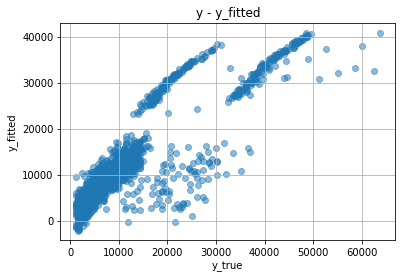

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

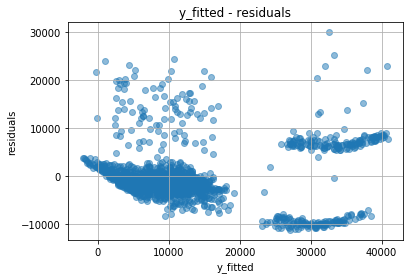

In [6]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Standardization:
Standardize all numerical features and keep the one-hot-encoded features.

In [7]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Standardize numerical features
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
scaler = StandardScaler()
fs123 = scaler.fit_transform(data3[['ft1','ft2','ft3']])
fs123 = pd.DataFrame(fs123, columns = ['ft1','ft2','ft3'])

# Get the dataset
X = pd.concat([fs123, fe456], axis = 1).values

In [8]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6051.3695241838495
Test RMSE:  5976.341526998487
--------------------
Train RMSE:  6025.560377283273
Test RMSE:  6195.262808822174
--------------------
Train RMSE:  6038.250869795185
Test RMSE:  6087.498376385133
--------------------
Train RMSE:  6019.424200492137
Test RMSE:  6272.609595187519
--------------------
Train RMSE:  6026.574940183816
Test RMSE:  6213.039051800159
--------------------
Train RMSE:  6134.549933247374
Test RMSE:  5158.0730868987
--------------------
Train RMSE:  6095.320776848486
Test RMSE:  5545.81496853266
--------------------
Train RMSE:  5932.488996633746
Test RMSE:  6963.6582296474035
--------------------
Train RMSE:  6072.260130482568
Test RMSE:  5772.909049941432
--------------------
Train RMSE:  5997.623956668823
Test RMSE:  6451.232130571958
--------------------
Averaged Train RMSE:  6039.342370581925
Averaged Test RMSE:  6063.643882478562


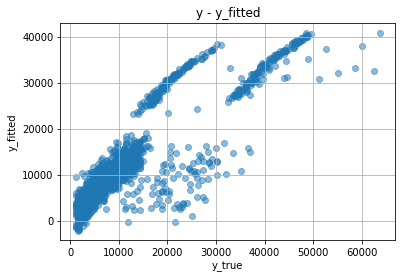

In [9]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

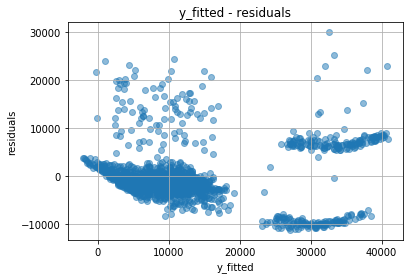

In [10]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Divide ft1 into 3 ranges

In [11]:
# Divide ft1
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ft1 = data3['ft1'].values
L = len(ft1)
for i in range(L):
    if ft1[i] < 30:
        ft1[i] = 1
    elif ft1[i] > 50:
        ft1[i] = 3
    else:
        ft1[i] = 2
        
ft1 = pd.DataFrame(ft1, columns = ['ft1'])
ft23 = fs123[['ft2','ft3']]
X = pd.concat([ft1, ft23, fe456], axis = 1).values

In [12]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6218.897752834433
Test RMSE:  6051.384757511032
--------------------
Train RMSE:  6184.27527269552
Test RMSE:  6352.2924134461755
--------------------
Train RMSE:  6177.846079737399
Test RMSE:  6417.106727227785
--------------------
Train RMSE:  6167.937668115899
Test RMSE:  6514.390825922543
--------------------
Train RMSE:  6202.875056032284
Test RMSE:  6213.293324441349
--------------------
Train RMSE:  6285.9887757629685
Test RMSE:  5390.965302787945
--------------------
Train RMSE:  6250.3377392278035
Test RMSE:  5739.512716296269
--------------------
Train RMSE:  6085.838920948148
Test RMSE:  7164.010402838773
--------------------
Train RMSE:  6242.548668025446
Test RMSE:  5815.526771378089
--------------------
Train RMSE:  6161.972899673732
Test RMSE:  6559.833191912017
--------------------
Averaged Train RMSE:  6197.851883305363
Averaged Test RMSE:  6221.8316433761975


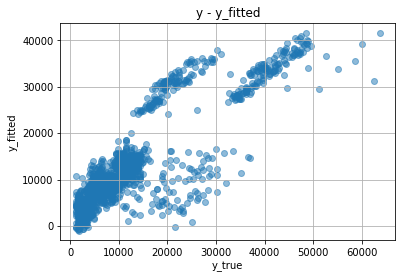

In [13]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

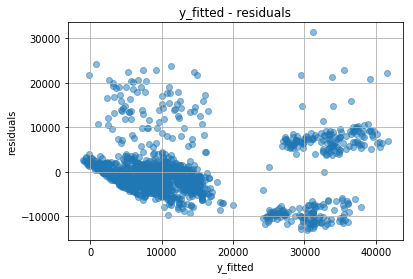

In [14]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

## Question 2: Correlation exploration
1. Convert each categorical feature into a one dimensional numerical value. Now we have 6 numerical features. Use **f_regression** and mutual information regression measure to select two most important variables respectively. Report the two most important variables you find.
2. Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5 (Yes or No).
3. Scatter plot charges (y axis) vs ft1 (x axis), and color points based on ft5 (Yes or No).

In [15]:
# Convert to numerical feature
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
fn123 = data3[['ft1','ft2','ft3']]
ft_dict = {"female":0,"male":1,"yes":1,"no":0,
          "northwest":1,"northeast":2,"southwest":3,"southeast":4}
fn4 = data3['ft4'].values
fn5 = data3['ft5'].values
L = len(fn4)
for i in range(L):
    fn4[i] = 1 if fn4[i] == "male" else 0
    fn5[i] = 1 if fn5[i] == "yes" else 0
fn6 = data3['ft6'].values
for i in range(L):
    if fn6[i] == "northwest":
        fn6[i] = ft_dict["northwest"]
    elif fn6[i] == "northeast":
        fn6[i] = ft_dict["northeast"]
    elif fn6[i] == "southwest":
        fn6[i] = ft_dict["southwest"]
    elif fn6[i] == "southeast":
        fn6[i] = ft_dict["southeast"]
    else:
        print("Value Error!")
        print(i)
        break
fn4 = pd.DataFrame(fn4, columns = ['ft4'])
fn5 = pd.DataFrame(fn5, columns = ['ft5'])
fn6 = pd.DataFrame(fn6, columns = ['ft6'])
X = pd.concat([fn123, fn4, fn5, fn6], axis = 1)

In [16]:
from sklearn.feature_selection import f_regression

# f_score accounts for relevance, the bigger, the better
# p-value is the posibility of mis-predicting the relevance

# Use f_regression
f_score, p_val = f_regression(X,y)
f_score_sort_idx = np.argsort(-f_score)
print('-'*20, "f_regression", '-'*20)
print("The first relevant feature is:","ft",f_score_sort_idx[0]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[0]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[0]])
print("The second relevant feature is:","ft",f_score_sort_idx[1]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[1]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[1]])

-------------------- f_regression --------------------
The first relevant feature is: ft 5
The corresponding f-score is: 2177.6148680565198
The corresponding p-value is: 8.271435842181086e-283
The second relevant feature is: ft 1
The corresponding f-score is: 131.17401258017017
The corresponding p-value is: 4.886693331722474e-29


#### In f_regression, ft5 & ft1 are selected.

In [17]:
from sklearn.feature_selection import mutual_info_regression

# Use mutual information regression measure
mi = mutual_info_regression(X, y, random_state = 42)
mi_sort_idx = np.argsort(-mi)
print('-'*20, "mutual_info_regression", '-'*20)
print("The first relevant feature is:","ft",mi_sort_idx[0]+1)
print("The mutual-info is:",mi[mi_sort_idx[0]])
print("The second relevant feature is:","ft",mi_sort_idx[1]+1)
print("The mutual-info is:",mi[mi_sort_idx[1]])

-------------------- mutual_info_regression --------------------
The first relevant feature is: ft 1
The mutual-info is: 1.498699315666744
The second relevant feature is: ft 5
The mutual-info is: 0.3691710531017536


#### For mutual_info_regression, ft1 & ft5 are selected.

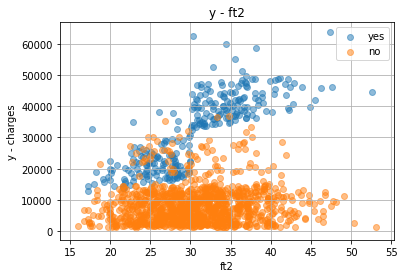

In [18]:
# Plot y against ft2

data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ft1 = data3['ft1'].values
ft2 = data3['ft2'].values
ft5_y = [i for i in range(L) if fn5.values[i] > 0]
ft5_n = [i for i in range(L) if fn5.values[i] == 0]

plt.scatter(ft2[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft2[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft2")
plt.xlabel("ft2")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

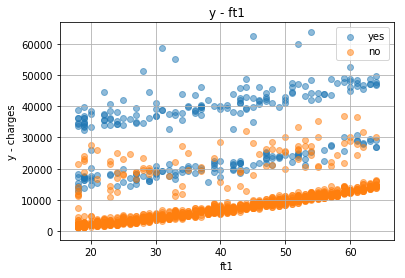

In [19]:
# Plot y against ft1
plt.scatter(ft1[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft1[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft1")
plt.xlabel("ft1")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

## Question 3: Modify the target variable
As we have seen so far, the target variable: charges (y) spans a wide range, so here instead of fitting the original value, we consider fitting log(y). Note here instead of calculating the difference between predicted value $(log(y_{predict}))$ and transformed target values (log y), we calculate the difference between $exp(log(y)_{predict})$ and y to set up a fair comparison.

- Pick one method of feature preprocessing from question 1 to train a linear regression model on this new target. Does the performance improve?
- Repaeat the correlation exploration part for the new target.

### One-Hot-Encoding feature encoding is chosen here

In [20]:
# Feature Encoding
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])

In [21]:
import math as mt

# Construct linear regression model
lr = LinearRegression(n_jobs = -1)
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values
L = len(data3['charges'])
y_log = data3['charges'].values
for i in range(L):
    y_log[i] = mt.log(y_log[i])

In [22]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
    X_train, y_train = X[trainset, :], y_log[trainset]
    X_test, y_test = X[testset, :], y_log[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    p_train = [mt.exp(x) for x in predicted_train]
    p_test = [mt.exp(x) for x in predicted_test]
    yt_train = data3['charges'].values[trainset]
    yt_test = data3['charges'].values[testset]
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(yt_train, p_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(yt_test, p_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
#     print(y_log)
#     print(data3.head())
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  8137.422270696507
Test RMSE:  10213.482559804492
--------------------
Train RMSE:  8298.558296807218
Test RMSE:  8598.787570193828
--------------------
Train RMSE:  8424.470733682936
Test RMSE:  9068.201618554234
--------------------
Train RMSE:  8452.337686773672
Test RMSE:  8685.607133587902
--------------------
Train RMSE:  8349.231544097136
Test RMSE:  7770.650162687589
--------------------
Train RMSE:  8385.945931041926
Test RMSE:  6141.677633709687
--------------------
Train RMSE:  8386.211666577203
Test RMSE:  8005.1256967970985
--------------------
Train RMSE:  8451.011489082737
Test RMSE:  7836.456018061523
--------------------
Train RMSE:  8457.395110808173
Test RMSE:  8105.415688722083
--------------------
Train RMSE:  8246.824816168144
Test RMSE:  9312.553183602091
--------------------
Averaged Train RMSE:  8358.940954573565
Averaged Test RMSE:  8373.795726572054


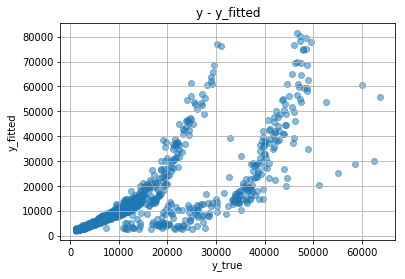

In [25]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y_log).predict(X)
y_fitted = [mt.exp(x) for x in y_fitted]
y = data3['charges'].values

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

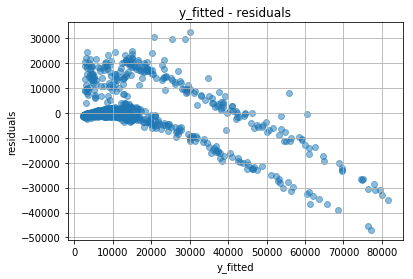

In [26]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Repeat Correlation Exploration part

In [27]:
# Convert to numerical feature
def getData_Label():
    data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
    fn123 = data3[['ft1','ft2','ft3']]
    ft_dict = {"female":0,"male":1,"yes":1,"no":0,
              "northwest":1,"northeast":2,"southwest":3,"southeast":4}
    fn4 = data3['ft4'].values
    fn5 = data3['ft5'].values
    L = len(fn4)
    for i in range(L):
        fn4[i] = 1 if fn4[i] == "male" else 0
        fn5[i] = 1 if fn5[i] == "yes" else 0
    fn6 = data3['ft6'].values
    for i in range(L):
        if fn6[i] == "northwest":
            fn6[i] = ft_dict["northwest"]
        elif fn6[i] == "northeast":
            fn6[i] = ft_dict["northeast"]
        elif fn6[i] == "southwest":
            fn6[i] = ft_dict["southwest"]
        elif fn6[i] == "southeast":
            fn6[i] = ft_dict["southeast"]
        else:
            print("Value Error!")
            print(i)
            break
    fn4 = pd.DataFrame(fn4, columns = ['ft4'])
    fn5 = pd.DataFrame(fn5, columns = ['ft5'])
    fn6 = pd.DataFrame(fn6, columns = ['ft6'])
    X = pd.concat([fn123, fn4, fn5, fn6], axis = 1)

    y = data3['charges'].values
    for i in range(L):
        y[i] = mt.log(y[i])
    return X,y
X, y  = getData_Label()

In [28]:
# Use f_regression
f_score, p_val = f_regression(X,y)
f_score_sort_idx = np.argsort(-f_score)
print('-'*20, "f_regression", '-'*20)
print("The first relevant feature is:","ft",f_score_sort_idx[0]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[0]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[0]])
print("The second relevant feature is:","ft",f_score_sort_idx[1]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[1]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[1]])

-------------------- f_regression --------------------
The first relevant feature is: ft 5
The corresponding f-score is: 1062.123922924936
The corresponding p-value is: 6.30764635716894e-172
The second relevant feature is: ft 1
The corresponding f-score is: 515.9770811225018
The corresponding p-value is: 7.477385218937348e-97


In [29]:
# Use mutual information regression measure
mi = mutual_info_regression(X, y, random_state = 42)
mi_sort_idx = np.argsort(-mi)
print('-'*20, "mutual_info_regression", '-'*20)
print("The first relevant feature is:","ft",mi_sort_idx[0]+1)
print("The mutual-info is:",mi[mi_sort_idx[0]])
print("The second relevant feature is:","ft",mi_sort_idx[1]+1)
print("The mutual-info is:",mi[mi_sort_idx[1]])

-------------------- mutual_info_regression --------------------
The first relevant feature is: ft 1
The mutual-info is: 1.5028511068473298
The second relevant feature is: ft 5
The mutual-info is: 0.3693933526662416


#### Still ft1 & ft5 are selected.

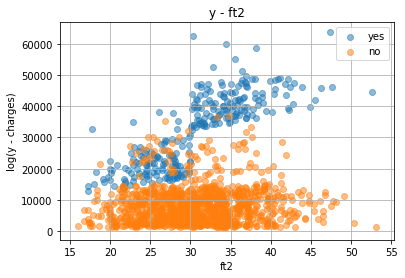

In [30]:
# Plot y against ft2

data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ft1 = data3['ft1'].values
ft2 = data3['ft2'].values
ft5_y = [i for i in range(L) if fn5.values[i] > 0]
ft5_n = [i for i in range(L) if fn5.values[i] == 0]
y = data3['charges'].values

plt.scatter(ft2[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft2[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft2")
plt.xlabel("ft2")
plt.ylabel("log(y - charges)")
plt.grid(True)
plt.legend(['yes','no'])

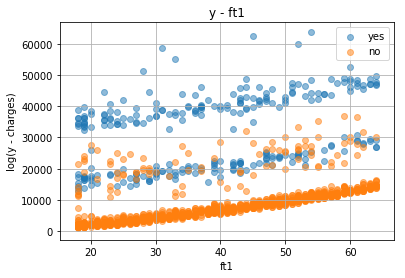

In [31]:
# Plot y against ft1
plt.scatter(ft1[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft1[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft1")
plt.xlabel("ft1")
plt.ylabel("log(y - charges)")
plt.grid(True)
plt.legend(['yes','no'])

## Bonus question:
- Considering current results, can you further improve your results by better feature encoding? You can try polymonial features or different combinations of encoding methods.
- Can you further improve your results by picking a better model?
    * You should try at least three different types of models (e.g. random forest, neural network, gradient boosting tree)
    * You can also try to modify the hyper-parameters of the models you have tried. Hint: you can use GridSearchCV as in project 1.

### OneHotEncoding + Polynomial + Modify target variable

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Better Encoding
X, y = getData_Label() # convert features to numerical feature
#X = X.values
#data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
#y = data3['charges'].values
kf = KFold(n_splits = 10)
lr = LinearRegression(n_jobs = -1)
rmse_train = []
rmse_test = []

# OneHotEncoding
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values

for num in range(1,6):
    poly = PolynomialFeatures(degree = num)
    X_trans = poly.fit_transform(X)
    
    rmse_train_num = 0
    rmse_test_num = 0
    
    for trainset, testset in kf.split(X_trans):
        X_train, y_train = X_trans[trainset, :], y[trainset]
        X_test, y_test = X_trans[testset, :], y[testset]
        lr.fit(X_train, y_train)
        
        predicted_train = lr.predict(X_train)
        predicted_test = lr.predict(X_test)
        
        yt_train = data3['charges'][trainset]
        yt_test = data3['charges'][testset]
        
        yp_train = [mt.exp(x) for x in predicted_train]
        yp_test = [mt.exp(x) for x in predicted_test]
 
        rmse_train_i = np.sqrt(metrics.mean_squared_error(yt_train, yp_train))
        rmse_test_i = np.sqrt(metrics.mean_squared_error(yt_test, yp_test))

#         rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
#         rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

        rmse_train_num = rmse_train_num + rmse_train_i
        rmse_test_num = rmse_test_num + rmse_test_i

    rmse_train_num = rmse_train_num / 10.0
    rmse_test_num = rmse_test_num / 10.0

    print('-' * 20,"Poly degree =",num,'-'*20)
    print("Averaged Train RMSE: ", rmse_train_num)
    print("Averaged Test RMSE: ", rmse_test_num)
    rmse_train.append(rmse_train_num)
    rmse_test.append(rmse_test_num)

-------------------- Poly degree = 1 --------------------
Averaged Train RMSE:  8358.940954573554
Averaged Test RMSE:  8373.795726572038
-------------------- Poly degree = 2 --------------------
Averaged Train RMSE:  5180.103424400011
Averaged Test RMSE:  5270.074041837238
-------------------- Poly degree = 3 --------------------
Averaged Train RMSE:  6041.856013541929
Averaged Test RMSE:  6706.863479360283
-------------------- Poly degree = 4 --------------------
Averaged Train RMSE:  4581.788743408271
Averaged Test RMSE:  7197.909619878288
-------------------- Poly degree = 5 --------------------
Averaged Train RMSE:  4158.5824683004885
Averaged Test RMSE:  207711.47665301443


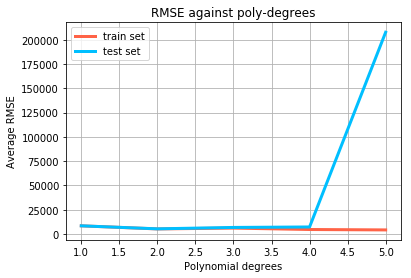

In [33]:
# plot RMSE against poly-degrees
plt.plot(range(1,6),rmse_train,linewidth=3,color='tomato')
plt.plot(range(1,6),rmse_test,linewidth=3,color='deepskyblue')
plt.grid(True)
plt.xlabel('Polynomial degrees')
plt.ylabel('Average RMSE')
plt.title('RMSE against poly-degrees')
plt.legend(['train set','test set'])

#### Degree 2 gives the best result.

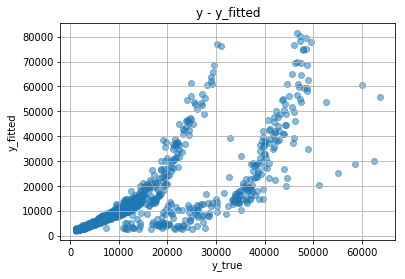

In [34]:
# Plot fitted values against true values 

data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
y_fitted = lr.fit(X, y).predict(X)
y_fitted = [mt.exp(x) for x in y_fitted]
y_org = data3['charges'].values

plt.scatter(y_org, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

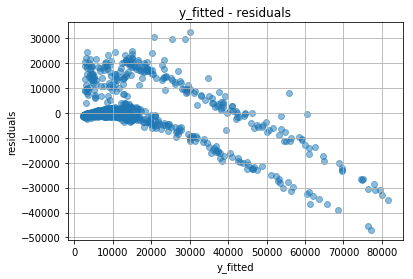

In [35]:
# Plot residuals versus fitted values
residuals = y_org - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Finding out a better model

### Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X, y = getData_Label()
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values
#y = data3['charges'].values

est1 = RandomForestRegressor(n_jobs=-1, 
                            oob_score=True,
                            max_features=11)
param1 = {'n_estimators': range(1,200,4), 
         'max_depth': range(1,20,2),
         'max_features': range(1,12,2)}
GS1 = GridSearchCV(estimator=est1, param_grid=param1, cv=10,
                  scoring='neg_mean_squared_error', n_jobs=-1)

# Train and Search
GS1.fit(X,y)
rs1 = GS1.cv_results_
best_est1 = GS1.best_estimator_
best_param1 = GS1.best_params_
best_score1 = GS1.best_score_

# Results
print('-'*20,'best-estimator','-'*20)
print(best_est1)
print('-'*20,'best-params','-'*20)
print(best_param1)
print('-'*20,'best-score','-'*20)
print(best_score1)

-------------------- best-estimator --------------------
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=65, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)
-------------------- best-params --------------------
{'max_depth': 7, 'max_features': 7, 'n_estimators': 65}
-------------------- best-score --------------------
-0.13655388755384198


In [37]:
# Using the best estimator to test
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

rf = RandomForestRegressor(n_jobs=-1, oob_score=True,
                           n_estimators=best_param1['n_estimators'],
                            max_depth=best_param1['max_depth'],
                            max_features=best_param1['max_features'])

for trainset, testset in kf.split(X):
    data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    rf.fit(X_train, y_train)
    
    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    p_train = [mt.exp(x) for x in predicted_train]
    p_test = [mt.exp(x) for x in predicted_test]
    yt_train = data3['charges'].values[trainset]
    yt_test = data3['charges'].values[testset]
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(yt_train, p_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(yt_test, p_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
#     print(y_log)
#     print(data3.head())
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  3832.203022326979
Test RMSE:  4073.2133394612997
--------------------
Train RMSE:  3740.18260374936
Test RMSE:  4373.745569808761
--------------------
Train RMSE:  3712.5277908447524
Test RMSE:  4809.7799672334795
--------------------
Train RMSE:  3677.375241381287
Test RMSE:  5388.537540271952
--------------------
Train RMSE:  3774.935163176882
Test RMSE:  4735.785272439611
--------------------
Train RMSE:  3882.6171275815555
Test RMSE:  2878.836852858917
--------------------
Train RMSE:  3785.237700041486
Test RMSE:  4163.820836243596
--------------------
Train RMSE:  3679.793541441593
Test RMSE:  5283.097403271884
--------------------
Train RMSE:  3818.288818734632
Test RMSE:  3997.9002614091864
--------------------
Train RMSE:  3769.0016746201036
Test RMSE:  4927.4451940585905
--------------------
Averaged Train RMSE:  3767.2162683898628
Averaged Test RMSE:  4463.216223705728


### Neural Network

In [38]:
from sklearn.neural_network import MLPRegressor

# Prepare data
X, y = getData_Label()
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values

est2 = MLPRegressor()
param2 = {'hidden_layer_sizes': [2, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
          'activation': ['relu','identity','logistic','tanh']}

GS2 = GridSearchCV(estimator=est2, param_grid=param2, cv=10,
                  scoring='neg_mean_squared_error', n_jobs=-1)

# Train and Search
GS2.fit(X,y)
rs2 = GS2.cv_results_
best_est2 = GS2.best_estimator_
best_param2 = GS2.best_params_
best_score2 = GS2.best_score_

# Results
print('-'*20,'best-estimator','-'*20)
print(best_est2)
print('-'*20,'best-params','-'*20)
print(best_param2)
print('-'*20,'best-score','-'*20)
print(best_score2)

-------------------- best-estimator --------------------
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
-------------------- best-params --------------------
{'activation': 'tanh', 'hidden_layer_sizes': 150}
-------------------- best-score --------------------
-0.1486192158916259


In [39]:
# Using the best estimator to test
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

mlpr = MLPRegressor(hidden_layer_sizes=best_param2['hidden_layer_sizes'],
                   activation=best_param2['activation'])

for trainset, testset in kf.split(X):
    data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    mlpr.fit(X_train, y_train)
    
    predicted_train = mlpr.predict(X_train)
    predicted_test = mlpr.predict(X_test)
    p_train = [mt.exp(x) for x in predicted_train]
    p_test = [mt.exp(x) for x in predicted_test]
    yt_train = data3['charges'].values[trainset]
    yt_test = data3['charges'].values[testset]
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(yt_train, p_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(yt_test, p_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
#     print(y_log)
#     print(data3.head())
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  5462.93643851447
Test RMSE:  5302.199133102349
--------------------
Train RMSE:  5421.992197931698
Test RMSE:  5567.647548018328
--------------------
Train RMSE:  5349.1480016453315
Test RMSE:  5496.022402561902
--------------------
Train RMSE:  5970.44140874484
Test RMSE:  6148.459071846095
--------------------
Train RMSE:  6070.030952146219
Test RMSE:  6422.366672004315
--------------------
Train RMSE:  6022.719282661698
Test RMSE:  5226.642697807789
--------------------
Train RMSE:  5361.301616495734
Test RMSE:  4981.516203939096
--------------------
Train RMSE:  5413.258345410779
Test RMSE:  6040.782360811851
--------------------
Train RMSE:  5672.342369032302
Test RMSE:  5657.711761446884
--------------------
Train RMSE:  5402.783596610947
Test RMSE:  6234.860732599228
--------------------
Averaged Train RMSE:  5614.695420919403
Averaged Test RMSE:  5707.820858413784


### Gradient Boosting Tree

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data
X, y = getData_Label()
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values

est3 = GradientBoostingRegressor(max_features=11)
param3 = {'n_estimators': range(1,200,4),
         'max_depth': range(1,20,2)}

GS3 = GridSearchCV(estimator=est3, param_grid=param3, cv=10,
                  scoring='neg_mean_squared_error', n_jobs=-1)

# Train and Search
GS3.fit(X,y)
rs3 = GS3.cv_results_
best_est3 = GS3.best_estimator_
best_param3 = GS3.best_params_
best_score3 = GS3.best_score_

# Results
print('-'*20,'best-estimator','-'*20)
print(best_est3)
print('-'*20,'best-params','-'*20)
print(best_param3)
print('-'*20,'best-score','-'*20)
print(best_score3)

-------------------- best-estimator --------------------
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=11,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=53, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
-------------------- best-params --------------------
{'max_depth': 3, 'n_estimators': 53}
-------------------- best-score --------------------
-0.135304370885529


In [42]:
# Using the best estimator to test
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

gbt = GradientBoostingRegressor(n_estimators=best_param3['n_estimators'],
                                max_depth=best_param3['max_depth'],
                                max_features=11)
    
for trainset, testset in kf.split(X):
    data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    gbt.fit(X_train, y_train)
    
    predicted_train = gbt.predict(X_train)
    predicted_test = gbt.predict(X_test)
    p_train = [mt.exp(x) for x in predicted_train]
    p_test = [mt.exp(x) for x in predicted_test]
    yt_train = data3['charges'].values[trainset]
    yt_test = data3['charges'].values[testset]
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(yt_train, p_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(yt_test, p_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
#     print(y_log)
#     print(data3.head())
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  4282.620646480522
Test RMSE:  4111.791395968281
--------------------
Train RMSE:  4245.57931183666
Test RMSE:  4338.032853556597
--------------------
Train RMSE:  4225.101797908466
Test RMSE:  4740.317937610835
--------------------
Train RMSE:  4142.426657684681
Test RMSE:  5486.64609289195
--------------------
Train RMSE:  4219.780197021576
Test RMSE:  4853.428469632582
--------------------
Train RMSE:  4378.144751100118
Test RMSE:  2904.70055845241
--------------------
Train RMSE:  4282.957878879562
Test RMSE:  4158.427956964033
--------------------
Train RMSE:  4187.566115785792
Test RMSE:  5297.353514064916
--------------------
Train RMSE:  4297.1106180583165
Test RMSE:  4374.583962370697
--------------------
Train RMSE:  4204.942281866896
Test RMSE:  4992.408808406948
--------------------
Averaged Train RMSE:  4246.623025662259
Averaged Test RMSE:  4525.7691549919255
